**RIDGE REGRESSION**

Ridge regression is a model tuning method that is used to analyse any data that suffers from multicollinearity. This method performs L2 regularization. When the issue of multicollinearity occurs, least-squares are unbiased, and variances are large, this results in predicted values being far away from the actual values.

IMPORTING LIBRARIES without using sklearn 

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

LOADING DATA SET

In [ ]:
df = pd.read_csv("/content/diabetes.csv")

In [ ]:
df.shape

(768, 9)

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


 **DATA** **PREPROCESSING**

CLEANING DATA SET

In [ ]:
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [ ]:
#looking for missing data
columns = list(df.columns)
columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [ ]:
print("missing values distrubution: ")
print(df.isnull().mean())
print("")

missing values distrubution: 
Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64



**FINDING** **OUTLIERS**

In [ ]:
#detecting the outliers using IQR,visualization
def find_outliers_IQR(df):
  Q1 = np.percentile(df, 25)
  Q3 = np.percentile(df, 75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5*IQR
  upper_bound = Q3 + 1.5*IQR
  outliers = df[(df > lower_bound) | (df < upper_bound)]
  return outliers, Q1, Q3, IQR

In [ ]:
outliers=find_outliers_IQR(df)
print(outliers)

(     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                 

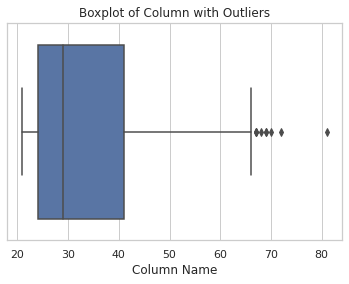

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# create a boxplot using Seaborn
sns.set(style="whitegrid")
ax = sns.boxplot(x=df["Age"])

# set the title and x-label
ax.set_title("Boxplot of Column with Outliers")
ax.set_xlabel("Column Name")

plt.show()


Text(0.5, 0, 'Column Name')

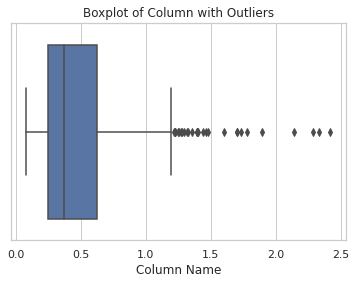

In [ ]:
# create a boxplot using Seaborn
sns.set(style="whitegrid")
ax = sns.boxplot(x=df["DiabetesPedigreeFunction"])

# set the title and x-label
ax.set_title("Boxplot of Column with Outliers")
ax.set_xlabel("Column Name")

In [ ]:
def generate_scores(mean=60,std_dev=12,num_samples=600):
	np.random.seed(27)
	scores = np.random.normal(loc=mean,scale=std_dev,size=num_samples)
	scores = np.round(scores, decimals=0)
	return scores
scores_data = generate_scores()

[Text(0.5, 1.0, 'Box Plot of Scores')]

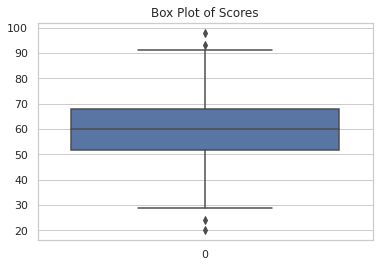

In [ ]:
sns.boxplot(data=scores_data).set(title="Box Plot of Scores")

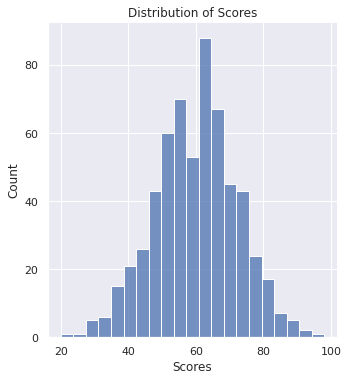

In [ ]:
sns.set_theme()
sns.displot(data=scores_data).set(title="Distribution of Scores", xlabel="Scores")

In [ ]:
df_scores = pd.DataFrame(scores_data,columns=['score'])

In [ ]:
df_scores.mean()

score    59.815
dtype: float64

In [ ]:
df_scores.std()

score    12.262601
dtype: float64

[Text(0.5, 1.0, 'Box Plot of Scores')]

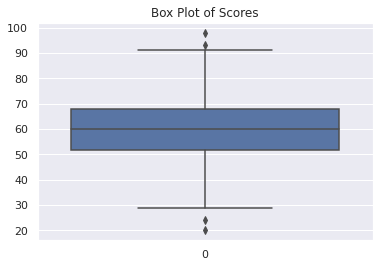

In [ ]:
sns.boxplot(data=scores_data).set(title="Box Plot of Scores")

In [ ]:
df_scores.describe()

,score
count,600.000000
mean,59.815000
std,12.262601
min,20.000000
25%,51.750000
50%,60.000000
75%,68.000000
max,98.000000


In [ ]:
IQR = 68-51
lower_limit = 51 - 1.5*IQR
upper_limit = 68 + 1.5*IQR
print(upper_limit)
print(lower_limit)

93.5
25.5


In [ ]:
df_scores_filtered = df_scores[(df_scores['score']>lower_limit) & (df_scores['score']<upper_limit)]
print(df_scores_filtered)

     score
0     75.0
1     56.0
2     67.0
3     65.0
4     63.0
..     ...
595   70.0
596   69.0
597   63.0
598   82.0
599   62.0

[597 rows x 1 columns]


[Text(0.5, 1.0, 'Box Plot of Scores')]

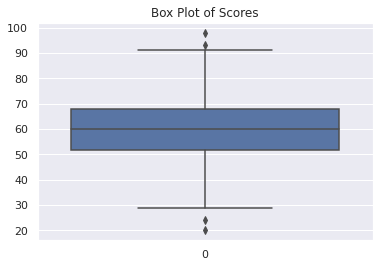

In [ ]:
sns.boxplot(data=scores_data).set(title="Box Plot of Scores")

In [ ]:
df.Insulin.unique()

array([  0,  94, 168,  88, 543, 846, 175, 230,  83,  96, 235, 146, 115,
       140, 110, 245,  54, 192, 207,  70, 240,  82,  36,  23, 300, 342,
       304, 142, 128,  38, 100,  90, 270,  71, 125, 176,  48,  64, 228,
        76, 220,  40, 152,  18, 135, 495,  37,  51,  99, 145, 225,  49,
        50,  92, 325,  63, 284, 119, 204, 155, 485,  53, 114, 105, 285,
       156,  78, 130,  55,  58, 160, 210, 318,  44, 190, 280,  87, 271,
       129, 120, 478,  56,  32, 744, 370,  45, 194, 680, 402, 258, 375,
       150,  67,  57, 116, 278, 122, 545,  75,  74, 182, 360, 215, 184,
        42, 132, 148, 180, 205,  85, 231,  29,  68,  52, 255, 171,  73,
       108,  43, 167, 249, 293,  66, 465,  89, 158,  84,  72,  59,  81,
       196, 415, 275, 165, 579, 310,  61, 474, 170, 277,  60,  14,  95,
       237, 191, 328, 250, 480, 265, 193,  79,  86, 326, 188, 106,  65,
       166, 274,  77, 126, 330, 600, 185,  25,  41, 272, 321, 144,  15,
       183,  91,  46, 440, 159, 540, 200, 335, 387,  22, 291, 39

In [ ]:
df.Insulin.max()

846

In [ ]:
df.Insulin.min()

0

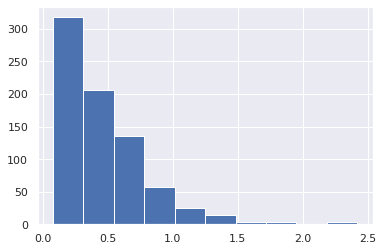

In [ ]:
#visualization
df.describe()
plt.hist(df['DiabetesPedigreeFunction'])
plt.show()

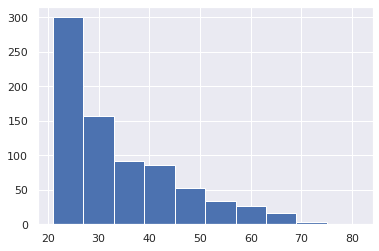

In [ ]:
df.describe()
plt.hist(df['Age'])
plt.show()

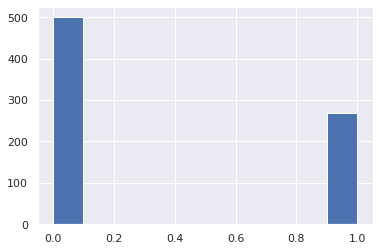

In [ ]:
df.describe()
plt.hist(df['Outcome'])
plt.show()

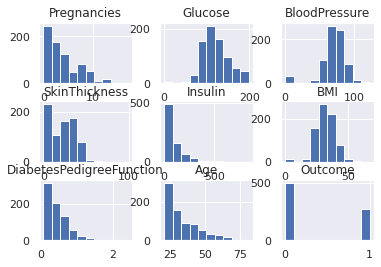

In [ ]:
# data visualization
df.hist()
plt.show()

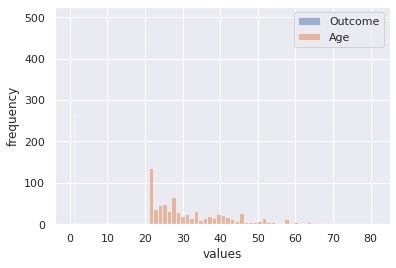

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


# Extract the two columns you want to plot
col1 = df['Outcome']
col2 = df['Age']

# Plot the histograms for the two columns
plt.hist(col1, bins=50, alpha=0.5, label='Outcome')
plt.hist(col2, bins=50, alpha=0.5, label='Age')

# Add labels and a legend
plt.xlabel('values')
plt.ylabel('frequency')
plt.legend()

# Show the plot
plt.show()


In [ ]:
import warnings
warnings.filterwarnings('ignore')

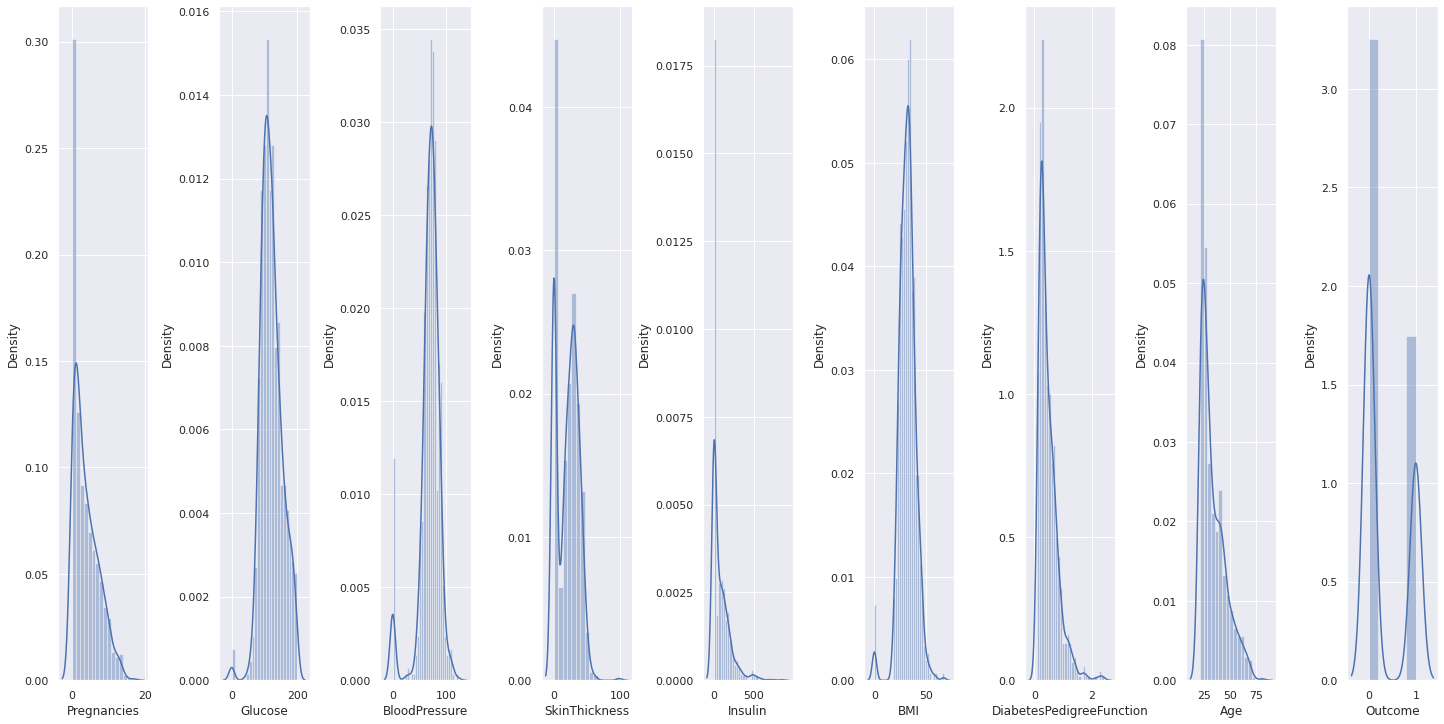

In [ ]:
#visualization
fig, axs = plt.subplots(ncols=9, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

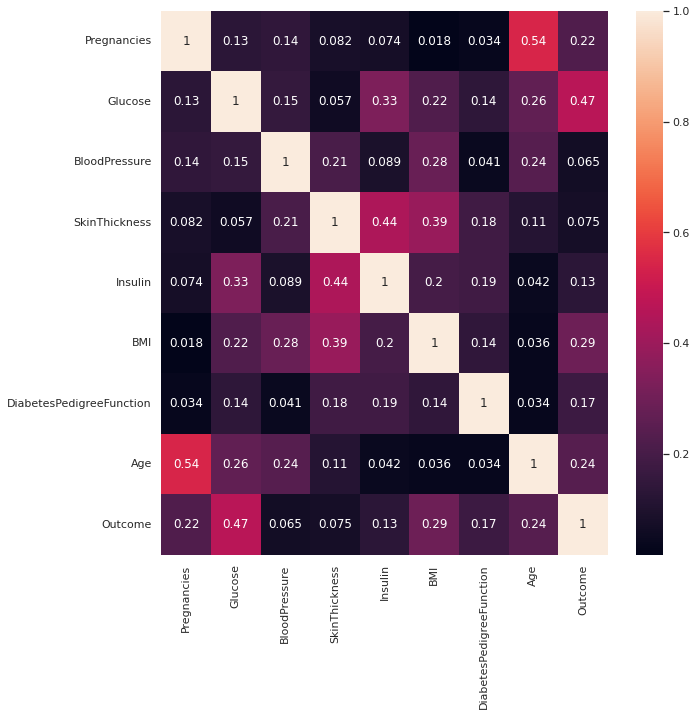

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 10))
corr_matrix = df.corr().abs()
sns.heatmap(corr_matrix, annot=True, ax=ax)
plt.show()


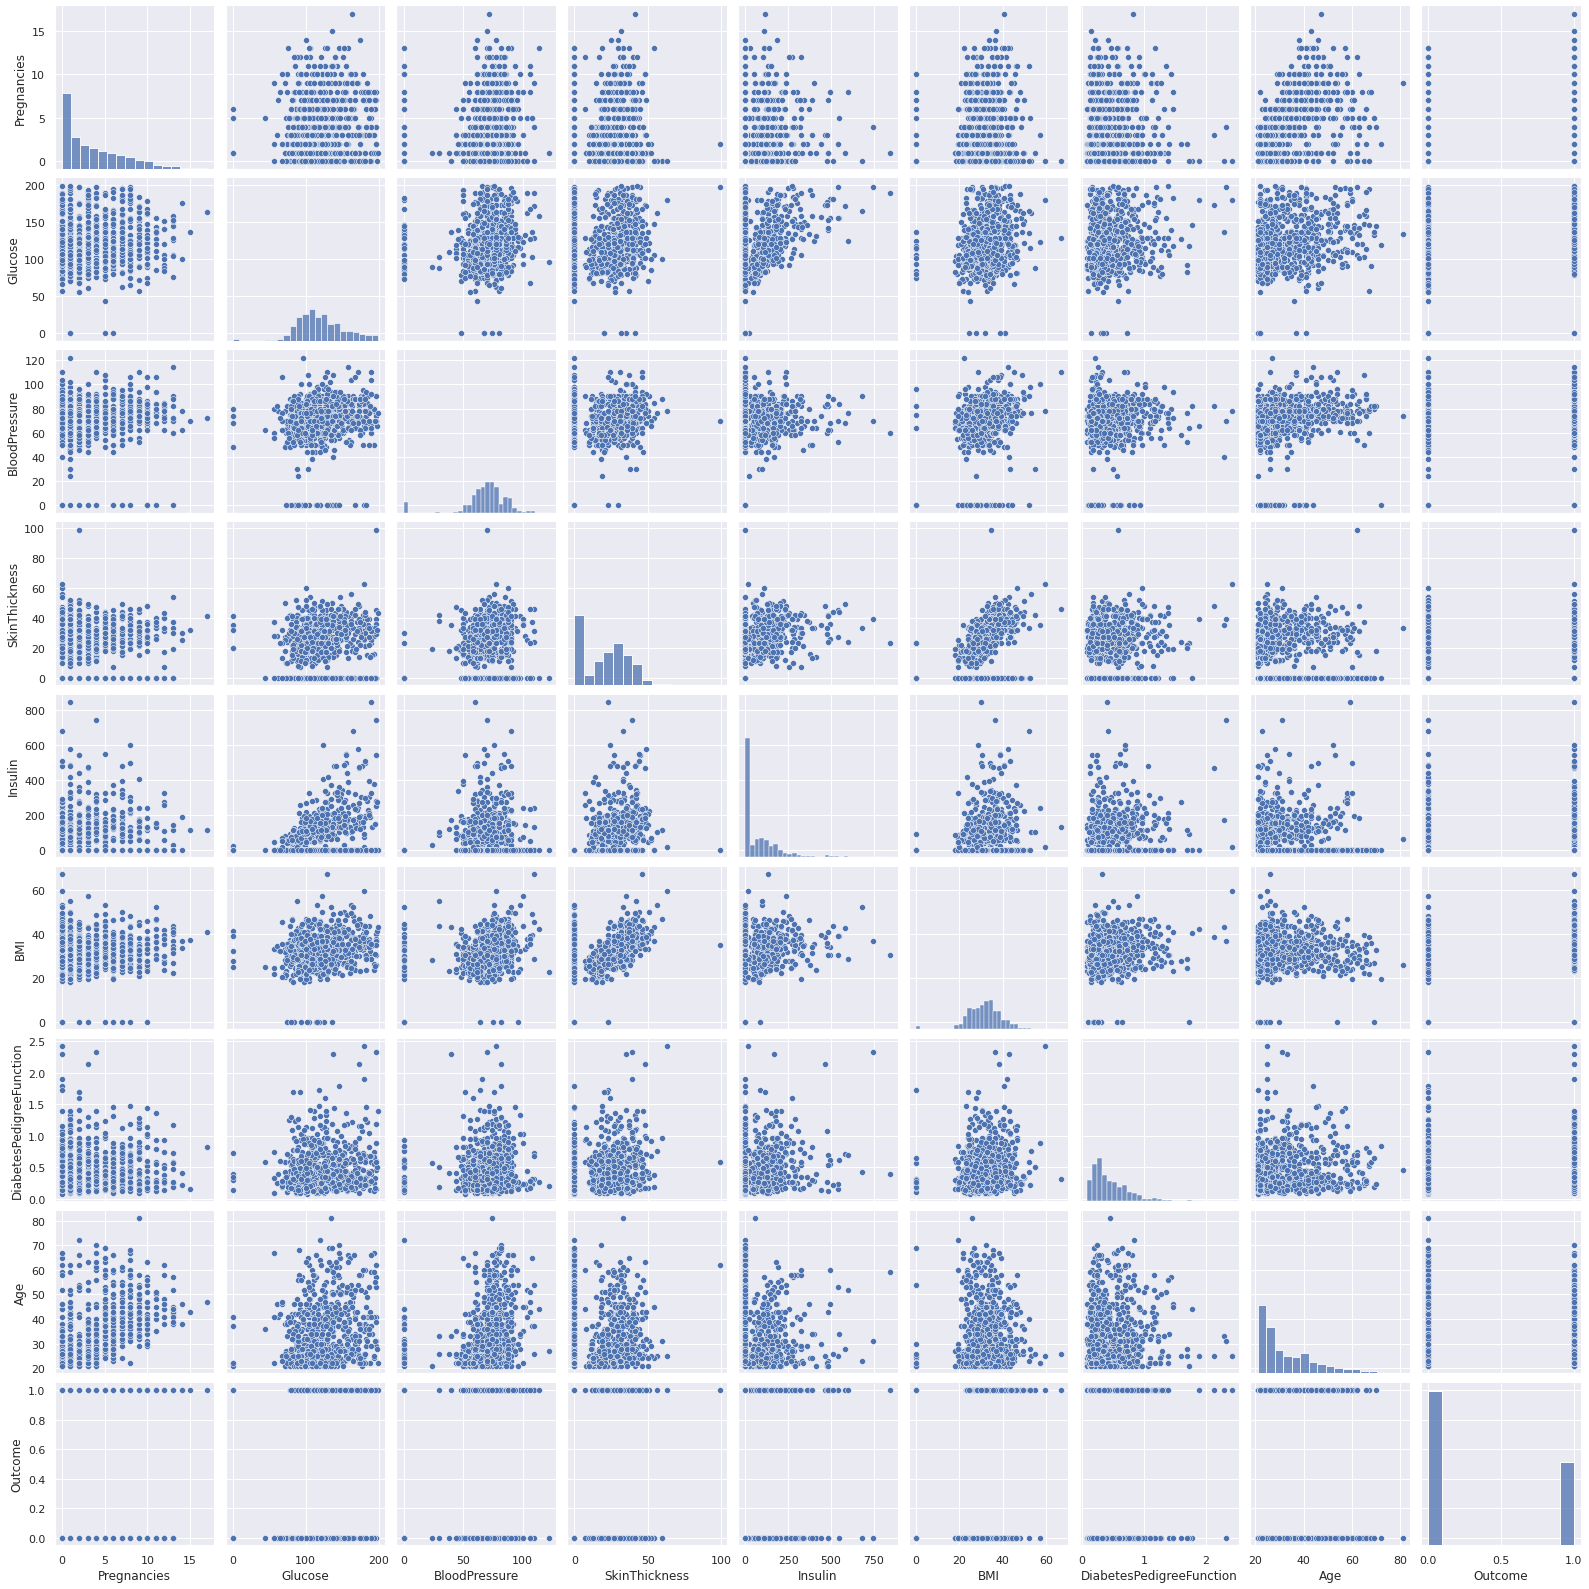

In [ ]:
sns.pairplot(df)
plt.show()

In [ ]:
#creating ridge regression model without using sklearn 
import numpy as np
import pandas as pd

# Load the dataset into a pandas dataframe
df = pd.read_csv('diabetes.csv')

In [ ]:
# Split the dataset into training and testing sets
train_df = df.sample(frac=0.8, random_state=123)
test_df = df.drop(train_df.index)

In [ ]:
# Normalize the data
train_df_norm = (train_df - train_df.mean()) / train_df.std()

In [ ]:
# Define the regularization parameter
lamda = 0.1

In [ ]:
# Create a matrix X of independent variables and a vector y of the dependent variable
X_train = train_df_norm.drop('Outcome', axis=1).values
y_train = train_df_norm['Outcome'].values.reshape(-1, 1)

In [ ]:
# Add a column of 1's to the matrix X
X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))

In [ ]:
# Compute the ridge regression coefficients
I = np.identity(X_train.shape[1])
w = np.linalg.inv(X_train.T @ X_train + lamda*I) @ X_train.T @ y_train

In [ ]:
# Normalize the test data
test_df_norm = (test_df - train_df.mean()) / train_df.std()

In [ ]:
# Create a matrix X_test of independent variables and a vector y_test of the dependent variable
X_test = test_df_norm.drop('Outcome', axis=1).values
y_test = test_df_norm['Outcome'].values.reshape(-1, 1)

In [ ]:
# Add a column of 1's to the matrix X_test
X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

In [ ]:
# Make predictions on the test data using the computed coefficients
y_pred = X_test @ w

In [ ]:
# Evaluate the performance of the model using mean squared error (MSE)
mse = np.mean((y_pred - y_test)**2)
print('Mean Squared Error: {:.4f}'.format(mse))

Mean Squared Error: 0.6774


In [ ]:
total_sum_squares = np.sum((y_test - np.mean(y_test))**2)
residual_sum_squares = np.sum((y_test - y_pred)**2)
r_squared = 1 - (residual_sum_squares / total_sum_squares)

# Print results
print("Mean Squared Error:", mse)
print("R-squared score:", r_squared)

Mean Squared Error: 0.6774100126387816
R-squared score: 0.33715494773049415


In [ ]:
### Creating a RidgeRegression class to calculate weights and predict test data

class RidgeRegression:
    def __init__(self, alpha):
        self.alpha = alpha
    
    def calculateWeights(self, X, Y):
        ### Calculating weights using L-2 regularized Moore-Penrose Inverse
        matrix_product1 = np.matmul(X.T, X)
        n = len(X[0])
        identity_matrix = self.alpha * np.identity(n)
        matrix_sum_1 = matrix_product1 + identity_matrix
        matrix_inverse = inv(matrix_sum_1)
        matrix_product_2 = np.matmul(X.T, Y)
        weights = np.matmul(matrix_inverse, matrix_product_2)
        return weights
    
    def predict(self, weights, X):
        ### Return the predicted values
        y_pred = np.matmul(X, weights)
        return y_pred
    
    def squaredLoss(self, weights, X, Y):
        matrix_product = np.matmul(X, weights)
        difference = np.subtract(Y, matrix_product)
        product1 = np.matmul(difference.T, difference)
        sum1 = np.sum(product1)
        product2 = self.alpha * np.matmul(weights.T, weights)
        squared_loss = (sum1 + product2)/2
        return squared_loss

In [ ]:
import numpy as np
import pandas as pd

# Load data
data = pd.read_csv('diabetes.csv')
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Define linear regression model
class RidgeRegression():
    def _init_(self, lr=0.01, num_iterations=1000):
        self.lr = lr
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None
    
    def fit(self, X, y):
        # Initialize weights and bias
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Gradient descent
        for i in range(self.num_iterations):
            y_pred = np.dot(X, self.weights) + self.bias
            dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
            db = (1/n_samples) * np.sum(y_pred - y)
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
    
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

# Define grid search function
def grid_search(X, y, hyperparams, cv=5):
    best_params = None
    best_score = float('-inf')
    
    for lr in hyperparams['lr']:
        for num_iterations in hyperparams['num_iterations']:
            model = RidgeRegression(lr=lr, num_iterations=num_iterations)
            
            # Perform cross-validation
            scores = []
            n_samples = X.shape[0]
            indices = np.arange(n_samples)
            np.random.shuffle(indices)
            X = X[indices]
            y = y[indices]
            fold_size = n_samples // cv
            for i in range(cv):
                start = i * fold_size
                end = min(start + fold_size, n_samples)
                X_val = X[start:end]
                y_val = y[start:end]
                X_train = np.concatenate([X[:start], X[end:]])
                y_train = np.concatenate([y[:start], y[end:]])
                
                model.fit(X_train, y_train)
                score = np.mean((model.predict(X_val) - y_val) ** 2)
                scores.append(score)
                
            mean_score = np.mean(scores)
            if mean_score > best_score:
                best_score = mean_score
                best_params = {'lr': lr, 'num_iterations': num_iterations}
    
    return best_params, best_score

# Define hyperparameter ranges to search over
hyperparams = {'lr': [0.001, 0.01, 0.1], 'num_iterations': [100, 1000, 10000]}

# Perform grid search
best_params, best_score = grid_search(X, y, hyperparams)

# Instantiate and train model with best hyperparameters
model = RidgeRegression(lr=best_params['lr'], num_iterations=best_params['num_iterations'])
model.fit(X, y)

# Make predictions
X_test = np.array([[1, 2, 3], [4, 5, 6]])
y_pred = model.predict(X_test)

TypeError: ignored

In [ ]:
my_string = "Pregnancies"
print(len(my_string)) # Output: 5


In [ ]:
# Define a list of numbers
my_list = [1, 2, 3, 4, 5]

# Use the len() function on the list
print(len(my_list)) # Output: 5

# Define a string
my_string = "Pregnancies"

# Use the len() function on the string
print(len(my_string)) # Output: 13

# Define a tuple
my_tuple = (1, 2, 3, 4, 5)

# Use the len() function on the tuple
print(len(my_tuple)) # Output: 5


In [ ]:
# Create a NumPy array with a column of string values
str_array = np.array([
    ["6", 148, 72, 35, 0, 33.6, 0.627, 50, 1],
    ["1", 85, 66, 29, 0, 26.6, 0.351, 31, 0],
    ["8", 183, 64, 0, 0, 23.3, 0.672, 32, 1]
])

# Convert the "pregnancies" column of strings to floats
float_array = str_array.astype(float)({0: np.float})

# Print the resulting array
print(float_array)


In [ ]:
my_string = "Pregnancies"
print(len(my_string)) # Output: 5

In [ ]:
X=df.drop(columns='Pregnancies')
y = df.Pregnancies

In [ ]:
# Load the diabetes dataset
data = np.loadtxt('diabetes.csv', delimiter=',')
X = data[:,:-1]
y = data[:,-1]

# Split the data into training and testing sets
np.random.seed(42)
indices = np.random.permutation(len(X))
train_indices, val_indices, test_indices = indices[:300], indices[300:400], indices[400:]
X_train, X_val, X_test = X[train_indices], X[val_indices], X[test_indices]
y_train, y_val, y_test = y[train_indices], y[val_indices], y[test_indices]

# Define a function to train and evaluate the ridge regression model
def train_and_evaluate_ridge(alpha, max_iter, tol):
    model = Ridge(alpha=alpha, max_iter=max_iter, tol=tol)
    model.fit(X_train, y_train)
    score = model.score(X_val, y_val)
    return score

# Define a grid of hyperparameters to search over
alpha_values = [0.01, 0.1, 1.0, 10.0]
max_iter_values = [100, 500, 1000]
tol_values = [1e-3, 1e-4, 1e-5]

best_score = -np.inf
best_params = None

# Iterate over the hyperparameters and train/evaluate the model
for alpha in alpha_values:
    for max_iter in max_iter_values:
        for tol in tol_values:
            score = train_and_evaluate_ridge(alpha, max_iter, tol)
            print(f"alpha={alpha}, max_iter={max_iter}, tol={tol}, score={score:.3f}")
            if score > best_score:
                best_score = score
                best_params = (alpha, max_iter, tol)

# Train a final model on the combined training and validation sets using the best hyperparameters
alpha, max_iter, tol = best_params
model = Ridge(alpha=alpha, max_iter=max_iter, tol=tol)
model.fit(np.concatenate((X_train, X_val)), np.concatenate((y_train, y_val)))

# Evaluate the final model on the test set
test_score = model.score(X_test, y_test)
print(f"Test score: {test_score:.3f}")


ValueError: ignored

In [ ]:
# Create a NumPy array with a column of string values
str_array = np.array(["1.23", "4.56", "7.89"])

# Convert the column of strings to floats
float_array = str_array.astype(np.float)

# Print the resulting array
print(float_array)


In [ ]:
import csv

# Load the features and labels from a CSV file
with open('diabetes.csv') as f:
    reader = csv.reader(f)
    data = [row for row in reader]
    
# Convert the data to NumPy arrays
data = np.array(data, dtype=np.float32)
X = data[:,:-1]
y = data[:,-1]


In [ ]:
import numpy as np

# Load the dataset
X = np.load('diabetes.npy')
y = np.load('labels.npy')

# Split the dataset into training and test sets
train_X, test_X = X[:800], X[800:]
train_y, test_y = y[:800], y[800:]


In [ ]:
import numpy as np

# Load the NumPy array from a file
X = np.load('/content/diabetes.csv')


In [ ]:
import os.path
import numpy as np
homedir=os.path.expanduser("~")
pathset=os.path.join(homedir,"/content/diabetes.csv.npy")
if not(os.path.exists(pathset)):
    ds={"ORE_MAX_GIORNATA":5}
    np.save(pathset, ds)

In [ ]:
import os
import numpy as np


# filename for the file you want to save
output_filename = "diabetes.npy"

homedir = os.path.expanduser("diabetes.csv")

# construct the directory string
pathset = os.path.join(homedir, "Pregnancies")

# check the directory does not exist
if not(os.path.exists(pathset)):

    # create the directory you want to save to
    os.mkdir(pathset)

    ds = {"ORE_MAX_GIORNATA": 5}

    # write the file in the new directory
    np.save(os.path.join(pathset, output_filename), ds)

In [ ]:
import os
import numpy as np


# filename for the file you want to save
output_filename = "settings.npy"

homedir = os.path.expanduser("~")

# construct the directory string
pathset = os.path.join(homedir, "Pregnancies")

# check the directory does not exist
if not(os.path.exists(pathset)):

    # create the directory you want to save to
    os.mkdir(pathset)

    ds = {"ORE_MAX_GIORNATA": 5}

    # write the file in the new directory
    np.save(os.path.join(pathset, output_filename), ds)

In [ ]:
import numpy as np
from numpy.linalg import inv

# Load the diabetes dataset
X = np.load('X_train.npy')
y = np.load('diabetes_y.npy')

# Split the dataset into training, validation, and test sets
X_trainval, X_test = X[:320], X[320:]
y_trainval, y_test = y[:320], y[320:]
X_train, X_val = X_trainval[:256], X_trainval[256:]
y_train, y_val = y_trainval[:256], y_trainval[256:]

# Define the range of alpha values to explore
alpha_values = [0.1, 1.0, 10.0]

# Iterate over the alpha values and evaluate the model performance on the validation set
best_alpha = None
best_mse = float('inf')
for alpha in alpha_values:
    # Fit the model on the training set
    XTX = np.dot(X_train.T, X_train)
    I = np.identity(XTX.shape[0])
    ridge_coef = np.dot(inv(XTX + alpha*I), np.dot(X_train.T, y_train))

    # Evaluate the model on the validation set
    y_pred = np.dot(X_val, ridge_coef)
    mse = np.mean((y_val - y_pred)**2)

    # Update the best hyperparameters if necessary
    if mse < best_mse:
        best_alpha = alpha
        best_mse = mse

# Fit the final model on the combined training and validation sets
XTX = np.dot(X_trainval.T, X_trainval)
I = np.identity(XTX.shape[0])
ridge_coef = np.dot(inv(XTX + best_alpha*I), np.dot(X_trainval.T, y_trainval))

# Evaluate the final model on the test set
y_pred = np.dot(X_test, ridge_coef)
mse = np.mean((y_test - y_pred)**2)
print("Best alpha: %.2f" % best_alpha)
print("Test MSE: %.2f" % mse)
